## Understanding the Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

## Business Goal:
We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market

### Step 1: Data Understanding and initial preparation

In [4]:
# Import the matplotlib, seaborn, numpy and pandas package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)

In [5]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
#loading the data and viewing the same
data = pd.read_csv('day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
#Checking for number of rows and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
#Summarizing all the numerical columns
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Therefore we have a dataset with no missing values, 16 initial columns and 730 rows

In the dataset some of the variables like _'weekday'_,_'mnth'_,_'weathersit'_ and _'season'_ have values as 1, 2, 3, 4 etc which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case. So, we will convert such feature values into categorical string values before proceeding with model building

In [11]:
#Converting variables season, mnth, weathersit, weekday to categorical string values

data['mnth']=data.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
data['weathersit']=data.weathersit.map({1: 'Clear',2:'Mist',3:'Light',4:'Heavy'})
data['weekday']=data.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
data['season']=data.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })

data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Also from the above dataset, columns such as _instant_, _casual_, _registered_ and _dteday_ can be removed. _instant_ contains unique identifiers for each entry that do not contain any defining value for the count(_cnt_) whereas the _mnth_ and _yr_ columns are individually present in the dataset, there by making the _dteday_ column redundant

The target variable column _cnt_ already contains the sum of both _casual_ as well as _registered_ rental counts by definition and also as per the problem statement. Therefore, as redundant variable columns they can also be eliminated

In [13]:
#Removing instant and dteday columns
data = data.drop(['instant','dteday','casual','registered'],axis=1)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
#Checking the dataset again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


Therefore, we have now 5 quantitative columns and 7 qualitative columns (both encoded and not encoded)

### Step 2: EDA and Data Visualization

#### Visualizing Categorical variables

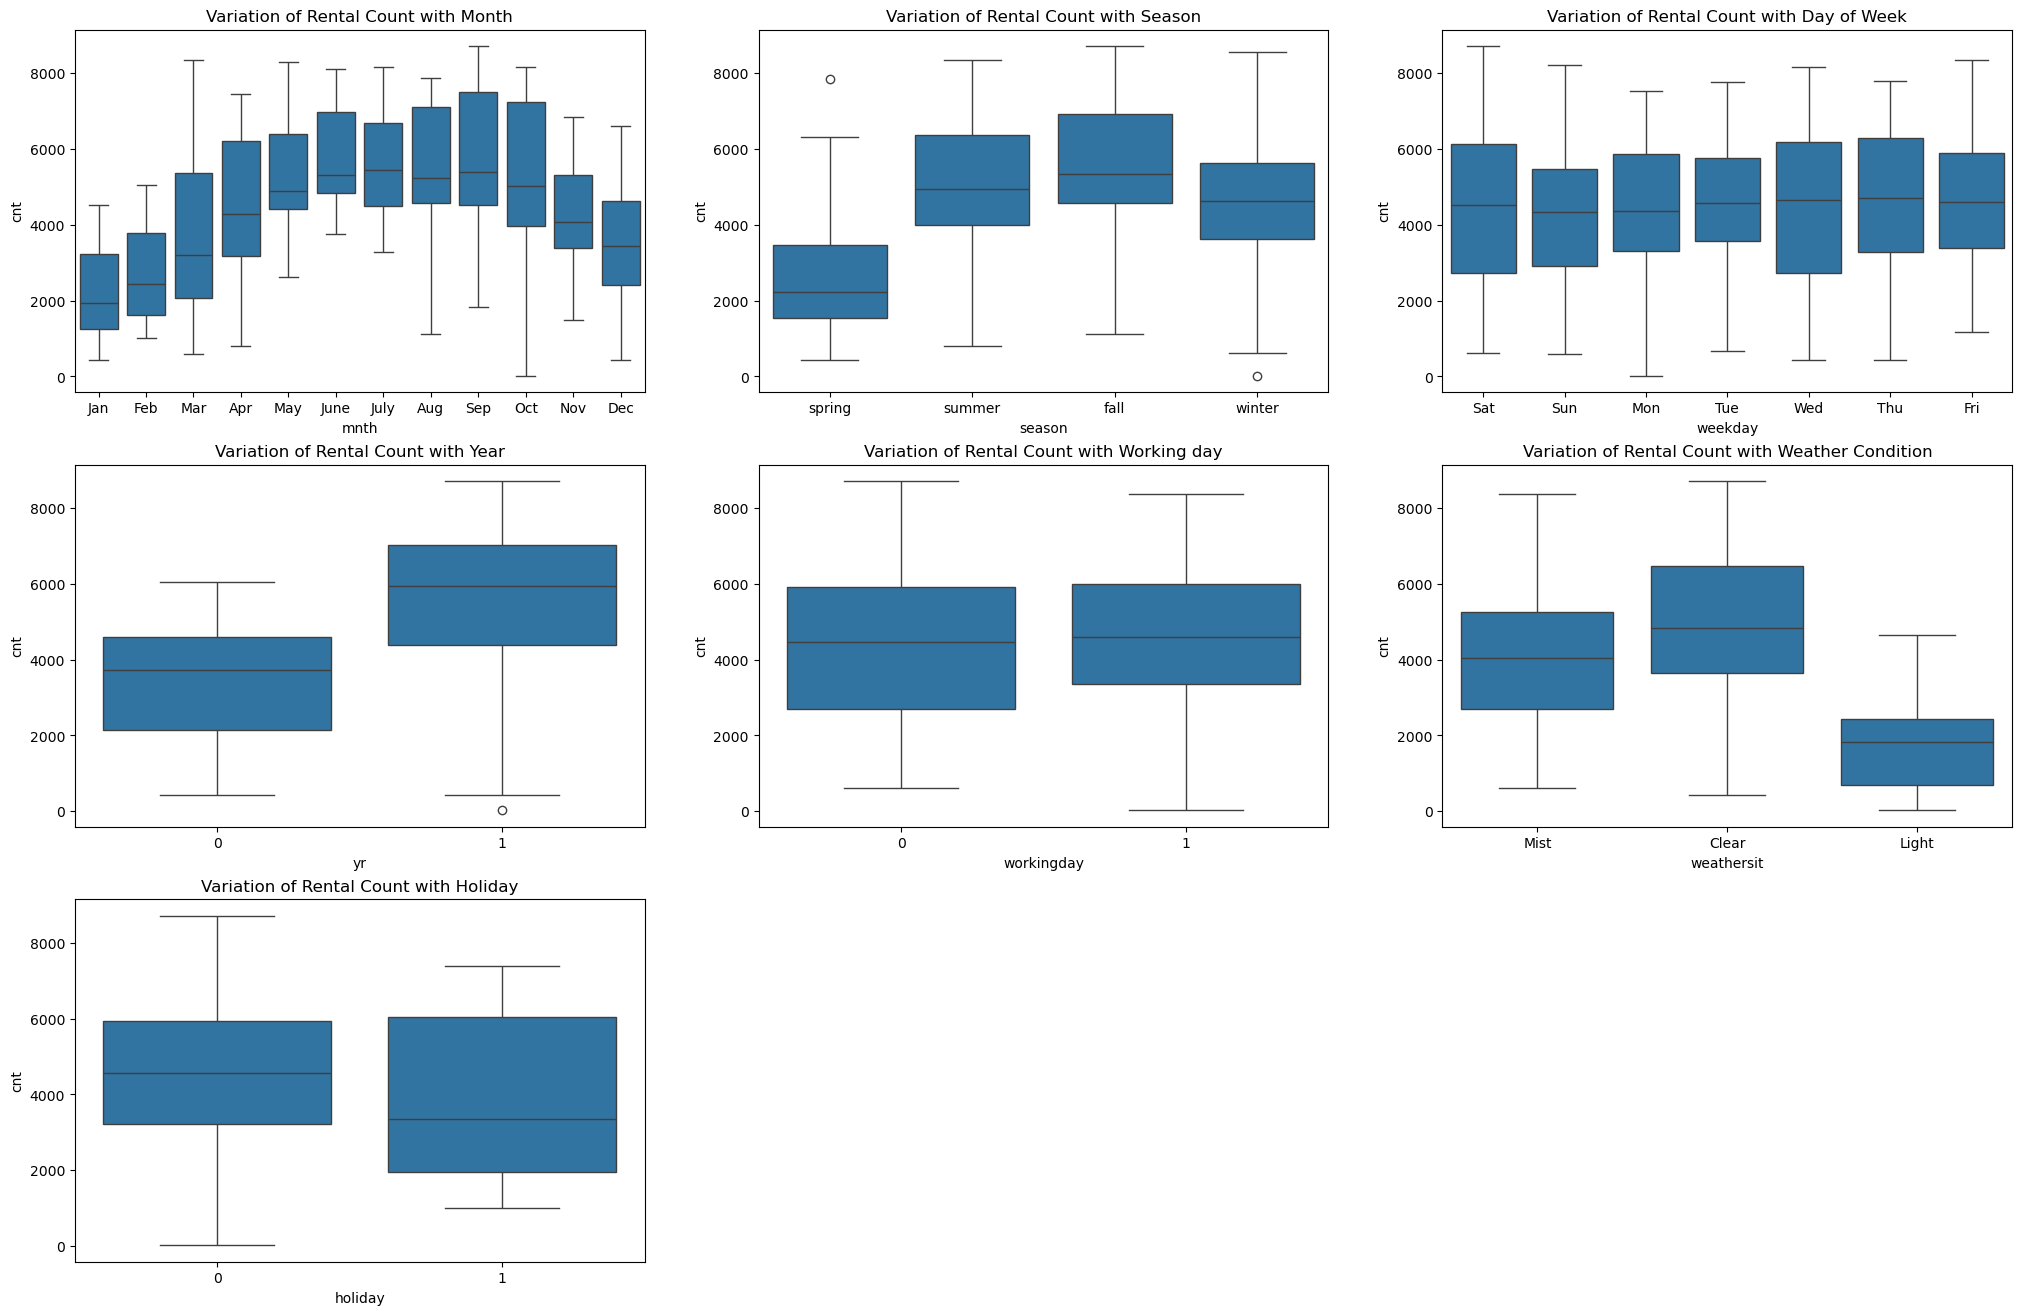

In [18]:
plt.figure(figsize=(25,16))
plt.subplot(3,3,1)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.title('Variation of Rental Count with Month')
plt.subplot(3,3,2)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.title('Variation of Rental Count with Season')
plt.subplot(3,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.title('Variation of Rental Count with Day of Week')
plt.subplot(3,3,4)
sns.boxplot(x = 'yr', y = 'cnt', data = data)
plt.title('Variation of Rental Count with Year')
plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.title('Variation of Rental Count with Working day')
plt.subplot(3,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.title('Variation of Rental Count with Weather Condition')
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.title('Variation of Rental Count with Holiday')
plt.show()

#### From the above plots we can deduce the following:
 - Median no of rental counts are significantly higher during
     1. 2019 as compared to 2018
     2. Regular days as compared to holidays, although the variance on holidays is higher
     3. Fall as compared to other seasons
     4. Clear, Few clouds, Partly cloudy, Partly cloudy days as compared to other weather conditions
     5. July and September, in comparison to all other months, with September having a relatively higher variance in rental counts

#### Visualizing Numerical variables with pairplot

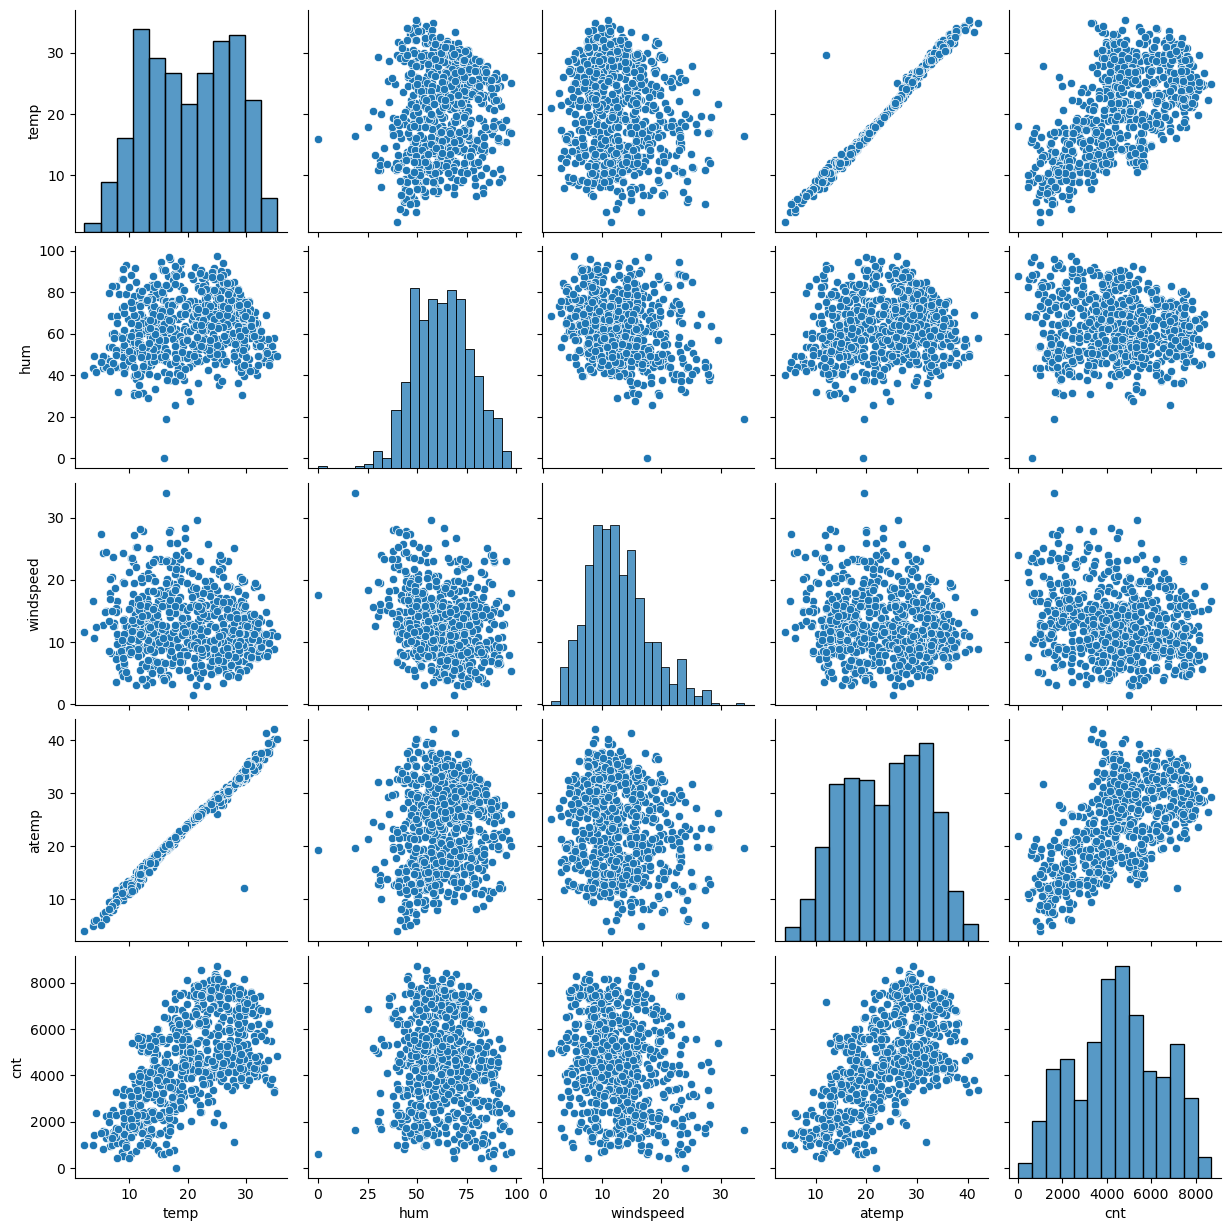

In [21]:
sns.pairplot(data, vars=['temp', 'hum', 'windspeed','atemp','cnt'])
plt.show()

From the above plot, we can deduce the following:
    
   1. _cnt_ shows strong linear relationship with _temp_ and _atemp_ variables compared to other numerical ones
   2. _temp_ and _atemp_ themselves are linearly correlated to each other, thereby having potential multicollinearity

We will therefore drop _atemp_ column

In [24]:
#Dropping atemp column
data = data.drop(['atemp'],axis=1)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [25]:
#viewing the dataset
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


#### From non-encoded categorical variables _season_, _mnth_, _yr_ and _weathersit_ we will now derive dummy variables

In [27]:
#getting dummy variables
data = pd.get_dummies(data,columns=['season','mnth','weekday','weathersit'],drop_first=True, dtype=int)
data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light,weathersit_Mist
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [28]:
#Checking the number of rows and columns
data.shape

(730, 29)

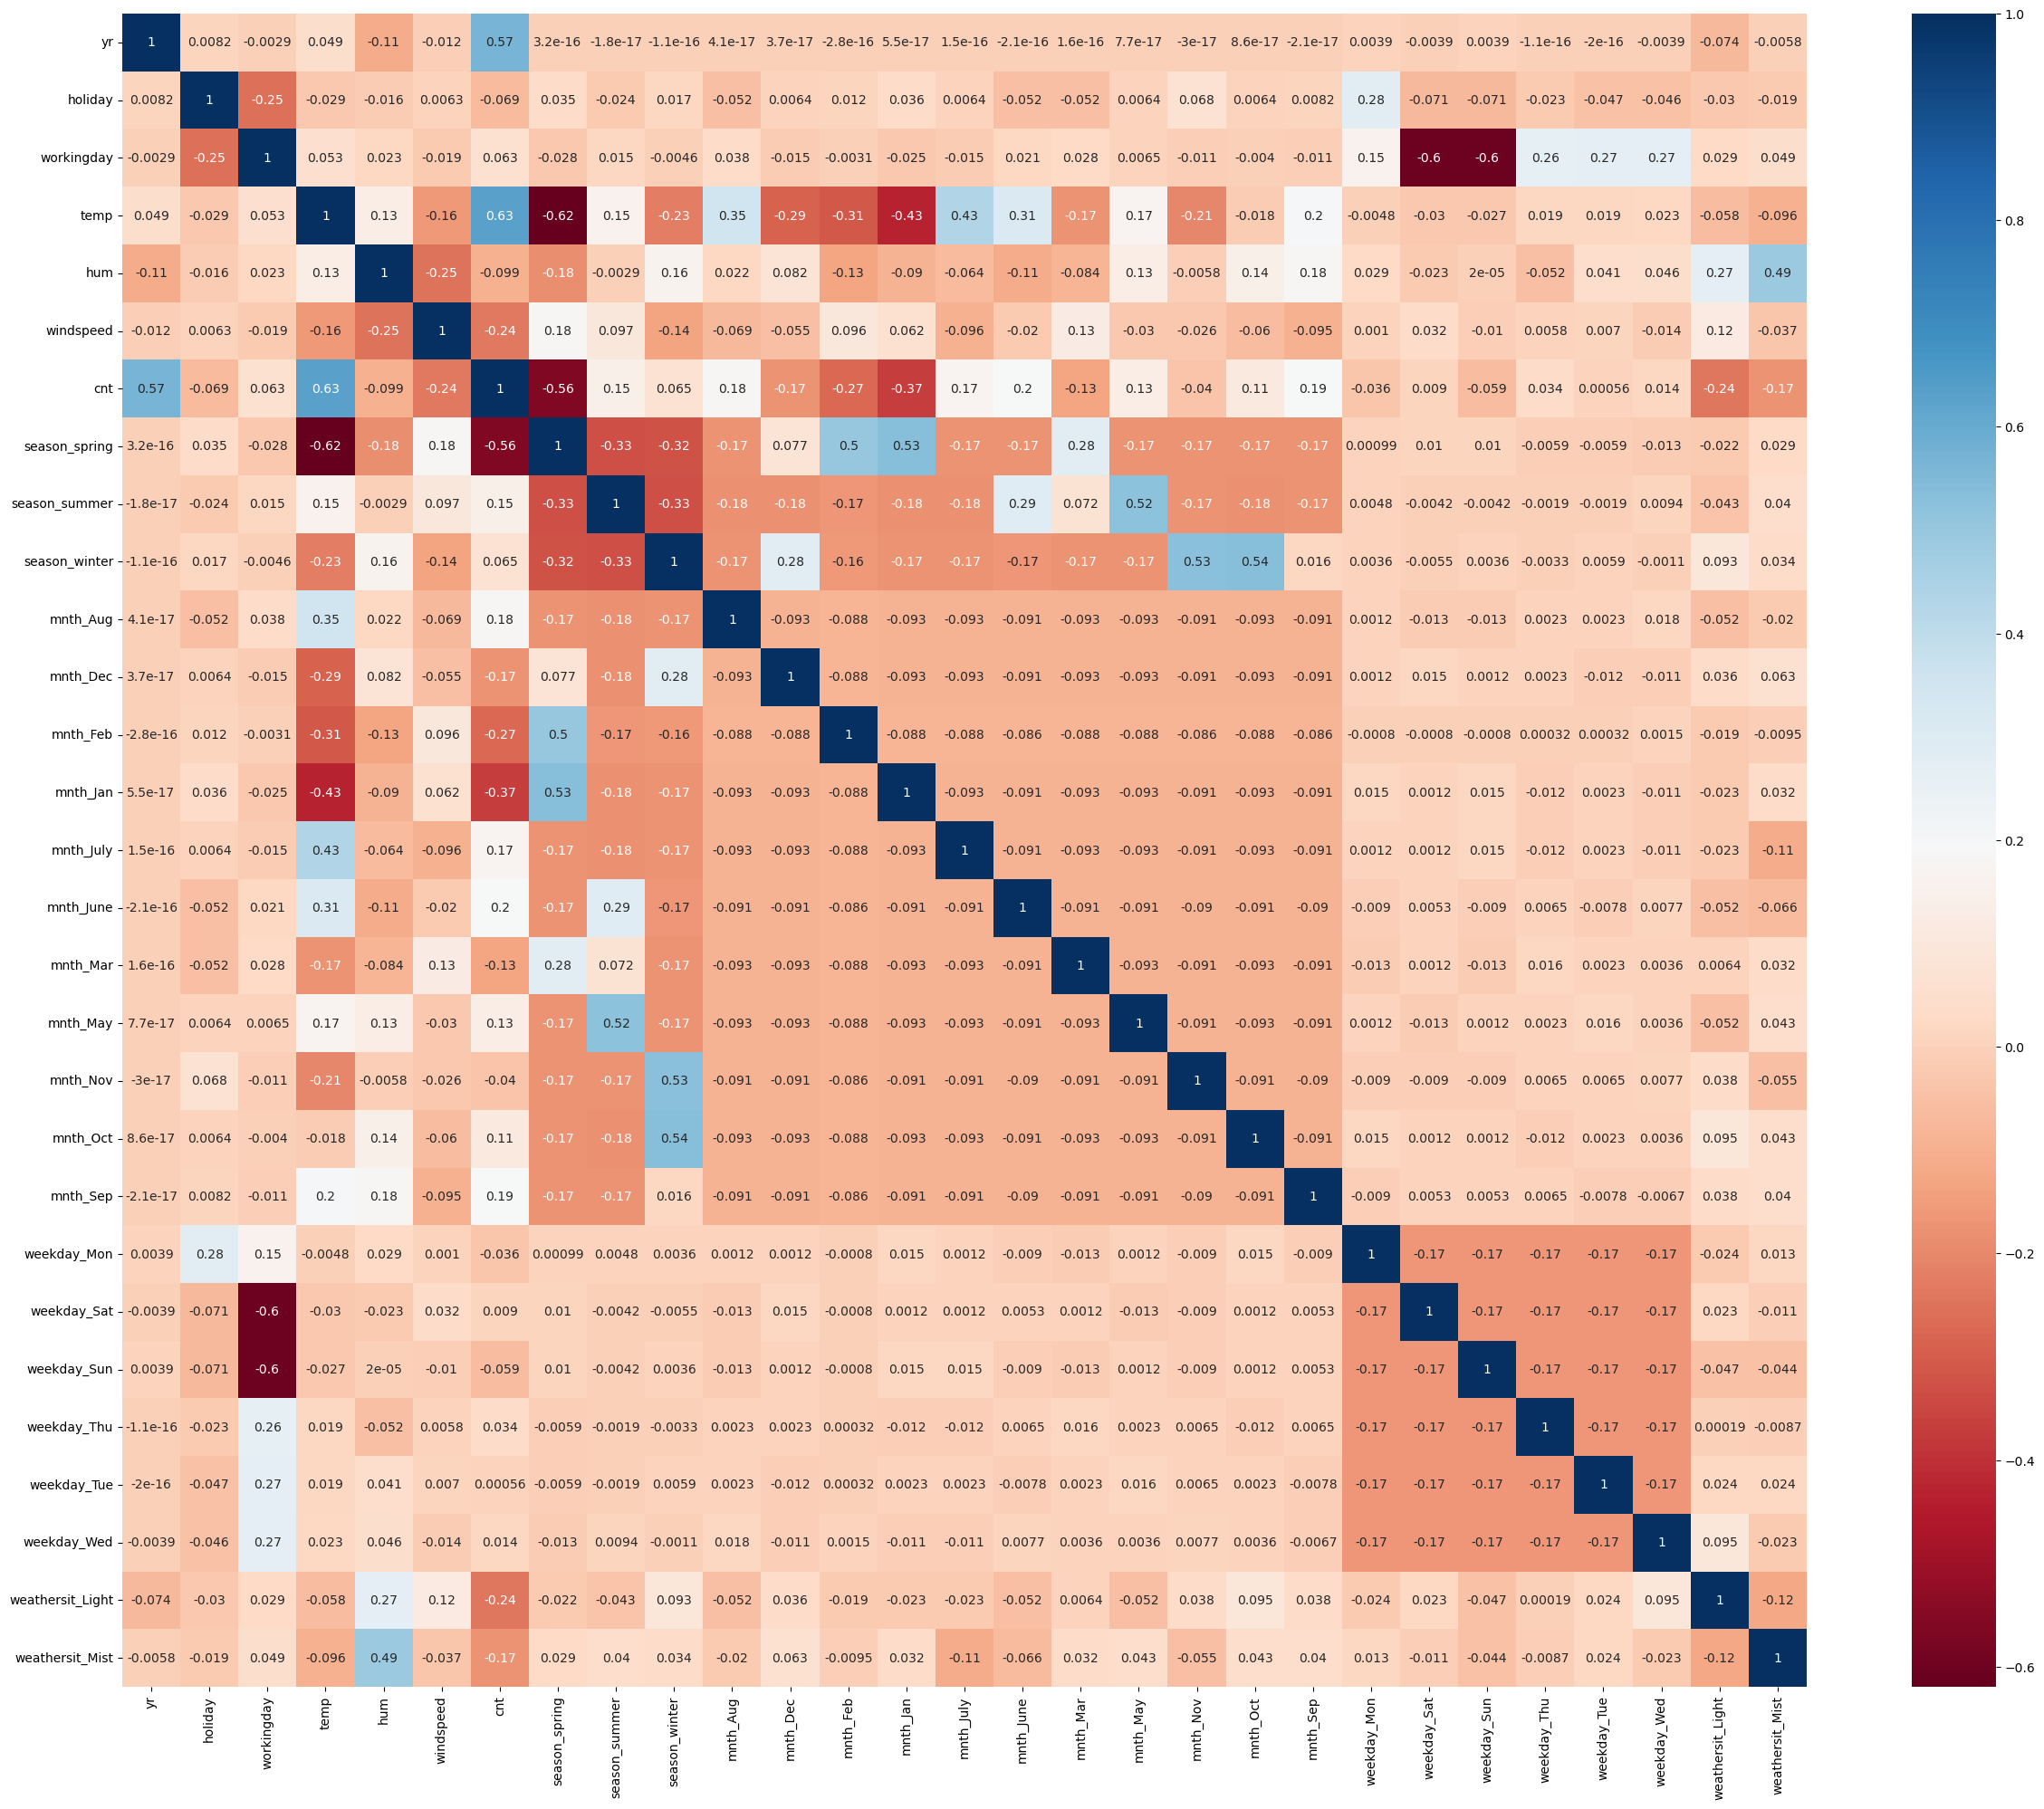

In [29]:
#Heatmap to see correlation between the new set of variables
plt.figure(figsize=(30, 24))
sns.heatmap(data.corr(), cmap='RdBu', annot = True)
plt.show()

From the heatmap above, we can see that _cnt_ is having a significant ( >0.5) correlation (positive as well as negative) with _yr_, _temp_ and _spring_ column(s). As this suggests linear relationship of the predictor variables with the target variable (which is continuous) we can consider building a Linear Regression Model

### Step 3: Building our Model

Before building the models, the features need to be scaled and the overall dataset needs to be split into train and test datasets

In [33]:
from sklearn.model_selection import train_test_split

#We will be performing a 80-20 split
data_train, data_test = train_test_split(data, train_size = 0.8, random_state = 108)

In [34]:
#Shape of training data
data_train.shape

(584, 29)

In [35]:
#Shape of testing data
data_test.shape

(146, 29)

#### Need for Scaling
Differences in the scales across input variables may increase the difficulty of the problem being modeled. An example of this is that large input values (e.g. a spread of hundreds or thousands of units) can result in a model that learns large weight values. A model with large weight values is often unstable, meaning that it may suffer from poor performance during learning and sensitivity to input values resulting in higher generalization error. More info on this at [https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/]

We would be using MinMax Scaler here as attributes are often normalized to lie in a fixed range — usually from zero to one—by dividing all values by the maximum value encountered or by subtracting the minimum value and dividing by the range between the maximum and minimum values.

In [38]:
#We are importing MinMax scaler
from sklearn.preprocessing import MinMaxScaler

#Instantiating a MinMax scaler object
scaler = MinMaxScaler()

#Listing all numeric variables
num_vars=['temp','hum','windspeed','cnt']

#Fitting and transforming on data
data_train[num_vars] = scaler.fit_transform(data_train[num_vars])
data_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light,weathersit_Mist
694,1,0,1,0.283360,0.442910,0.050010,0.561586,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
37,0,0,1,0.228905,0.701540,0.047450,0.153632,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
42,0,0,0,0.164646,0.454063,0.373090,0.124622,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
44,0,0,1,0.416232,0.239511,0.815378,0.177928,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
279,0,0,1,0.541481,0.632502,0.000000,0.549257,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [39]:
#Checking numeric variables post scaling
data_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light,weathersit_Mist
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.498288,0.025685,0.678082,0.517967,0.556426,0.351264,0.487926,0.255137,0.260274,0.234589,0.080479,0.085616,0.078767,0.085616,0.090753,0.075342,0.087329,0.089041,0.078767,0.083904,0.071918,0.136986,0.150685,0.145548,0.140411,0.138699,0.148973,0.023973,0.337329
std,0.500426,0.158329,0.467612,0.242172,0.179611,0.159530,0.233339,0.436312,0.439160,0.424105,0.272267,0.280037,0.269606,0.280037,0.287504,0.264169,0.282558,0.285047,0.269606,0.277482,0.258573,0.344128,0.358048,0.352955,0.347711,0.345928,0.356367,0.153095,0.473203
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.303237,0.414763,0.235894,0.323401,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.509896,0.553637,0.333792,0.488819,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.730987,0.689458,0.438467,0.663030,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Therefore, all numeric variables are now mapped between 0 and 1

Dividing the data into X and y sets for building the model

In [42]:
y_train = data_train.pop('cnt')
X_train = data_train

#### Let us first build our baseline model with all features

In [44]:
import statsmodels.api as sm
X_train_lb = sm.add_constant(X_train)

lb = sm.OLS(y_train.astype(float), X_train_lb.astype(float)).fit()

In [45]:
# getting the model summary
lb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     116.5
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          5.28e-209
Time:                        15:12:47   Log-Likelihood:                 575.18
No. Observations:                 584   AIC:                            -1094.
Df Residuals:                     556   BIC:                            -972.0
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2582      0.033      7.854      0.000       0.194       0.323
yr                   0.2438      0.008     30.932      0.000       0.228       0.259
holiday             -0.0059      0.023     -0.256      0.798      -0.051       0.039
workingday           0.1086      0.012      9.315      0.000       0.086       0.132
temp                 0.4476      0.043     10.331      0.000       0.363       0.533
hum                 -0.1370      0.032     -4.217      0.000      -0.201      -0.073
windspeed           -0.1579      0.027     -5.878      0.000      -0.211      -0.105
season_spring       -0.1059      0.029     -3.605      0.000      -0.164      -0.048
season_summer       -0.0224      0.026     -0.870      0.384      -0.073       0.028
season_winter        0.0722      0.027      2.656      0.008       0.019       0.126
mnth_Aug            -0.0511      0.033     -1.535      0.125      -0.117       0.014
mnth_Dec            -0.0842      0.033     -2.584      0.010      -0.148      -0.020
mnth_Feb            -0.0539      0.032     -1.675      0.094      -0.117       0.009
mnth_Jan            -0.0659      0.034     -1.964      0.050      -0.132    1.55e-05
mnth_July           -0.1124      0.034     -3.295      0.001      -0.179      -0.045
mnth_June           -0.0144      0.024     -0.604      0.546      -0.061       0.032
mnth_Mar            -0.0112      0.025     -0.452      0.652      -0.060       0.038
mnth_May             0.0196      0.019      1.006      0.315      -0.019       0.058
mnth_Nov            -0.0885      0.036     -2.487      0.013      -0.158      -0.019
mnth_Oct            -0.0090      0.035     -0.259      0.796      -0.077       0.059
mnth_Sep             0.0262      0.031      0.838      0.403      -0.035       0.088
weekday_Mon         -0.0236      0.015     -1.578      0.115      -0.053       0.006
weekday_Sat          0.1024      0.013      7.822      0.000       0.077       0.128
weekday_Sun          0.0530      0.013      4.033      0.000       0.027       0.079
weekday_Thu         -0.0126      0.015     -0.865      0.387      -0.041       0.016
weekday_Tue         -0.0227      0.015     -1.550      0.122      -0.052       0.006
weekday_Wed         -0.0074      0.015     -0.509      0.611      -0.036       0.021
weathersit_Light    -0.2266      0.029     -7.717      0.000      -0.284      -0.169
weathersit_Mist     -0.0604      0.011     -5.654      0.000      -0.081      -0.039
==============================================================================
Omnibus:                       89.334   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.489
Skew:                          -0.802   Prob(JB):                     1.61e-47
Kurtosis:                       5.507   Cond. N

Therefore, our baseline model has an R-squared value of 85% and an adjusted R-squared value of 84.2%

#### Feature Selection
We will now begin with feature selection process. First we would perform automatic feature selection using RFE (Recursive Feature Elimination)

In [48]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [49]:
# We will first fit the training data into the Linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [50]:
# We will now run RFE on the model by selecting the top 15 features out of the 29 present 
# (i.e. about 1/2 of the total number of feature params)
rfe = RFE(lm,n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [51]:
#Generating the list of variables selected
rfe_list = list(zip(X_train.columns,rfe.support_,rfe.ranking_))
rfe_list

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 8),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 5),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', False, 3),
 ('mnth_July', True, 1),
 ('mnth_June', False, 6),
 ('mnth_Mar', False, 10),
 ('mnth_May', False, 14),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', False, 2),
 ('weekday_Mon', False, 7),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 11),
 ('weekday_Tue', False, 9),
 ('weekday_Wed', False, 13),
 ('weathersit_Light', True, 1),
 ('weathersit_Mist', True, 1)]

In [52]:
#List of Columns where RFE support is True
cols = X_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_Dec', 'mnth_July', 'mnth_Nov',
       'weekday_Sat', 'weekday_Sun', 'weathersit_Light', 'weathersit_Mist'],
      dtype='object')

#### Using Statsmodel  to build and evaluate our model

#### Iteration 1

In [55]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[cols]

In [56]:
# Adding a constant variable  
X_train_rfe = sm.add_constant(X_train_rfe)

In [57]:
# Running the linear model 
lm = sm.OLS(y_train.astype(float),X_train_rfe.astype(float)).fit()

In [58]:
# Printing the model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     215.9
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          6.27e-217
Time:                        15:12:48   Log-Likelihood:                 559.73
No. Observations:                 584   AIC:                            -1089.
Df Residuals:                     569   BIC:                            -1024.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2185      0.022  

#### Checking VIF
A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. Multicollinearity exists when there is a correlation between multiple independent variables in a multiple regression model. This can adversely affect the regression results. Thus, the variance inflation factor can estimate how much the variance of a regression coefficient is inflated due to multicollinearity. General Rule of Thumb is to reject values > 5

The formula for calculating VIF is:

## $ VIF_i= \frac{1}{(1−R_i^2)} $

In [60]:
#Drop the constant term B0
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [61]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,32.59
11,weekday_Sat,7.96
12,weekday_Sun,7.66
3,temp,3.32
6,season_spring,2.65
1,holiday,2.29
7,season_winter,2.23
4,hum,2.10
14,weathersit_Mist,1.68
10,mnth_Nov,1.61


We can see 'holiday' has a high p-value of 0.2 (at a significance level of 0.05), which implies that it has no significant impact on 'cnt'. Therefore in our next iteration, we will remove this column

#### Iteration 2

In [64]:
#Drop Holiday column
X_train_new2 = X_train_rfe.drop(["holiday"], axis = 1)

In [65]:
#Build a model
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     215.9
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          6.27e-217
Time:                        15:12:48   Log-Likelihood:                 559.73
No. Observations:                 584   AIC:                            -1089.
Df Residuals:                     569   BIC:                            -1024.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1921      0.037  

In [66]:
#Drop the constant term B0
X_train_lm2 = X_train_lm2.drop(['const'], axis=1)

In [67]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,18.62
2,temp,15.57
1,workingday,14.97
4,windspeed,5.80
10,weekday_Sat,4.08
11,weekday_Sun,3.93
5,season_spring,2.89
6,season_winter,2.77
13,weathersit_Mist,2.46
0,yr,2.01


We can see 'hum' has a high VI of 18.62, which implies that it has strong multicollinearity with other variables. Therefore in our next iteration, we will remove this column

#### Iteration 3

In [70]:
#Drop hum column
X_train_new3 = X_train_new2.drop(["hum"], axis = 1)

In [71]:
#Build a model
X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     226.0
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          5.62e-215
Time:                        15:12:48   Log-Likelihood:                 552.28
No. Observations:                 584   AIC:                            -1077.
Df Residuals:                     570   BIC:                            -1015.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1347      0.034  

In [72]:
#Drop the constant term B0
X_train_lm3 = X_train_lm3.drop(['const'], axis=1)

In [73]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,13.15
2,temp,11.35
3,windspeed,5.62
9,weekday_Sat,3.69
10,weekday_Sun,3.43
4,season_spring,2.64
5,season_winter,2.60
0,yr,1.99
8,mnth_Nov,1.71
12,weathersit_Mist,1.58


We can see 'workingday' has a high VIF of 13.15 (>>5), which implies that it has significant multicollinearity with other predictors. Therefore in our next iteration, we will remove this column

#### Iteration 4

In [76]:
#Drop Tue column
X_train_new4 = X_train_new3.drop(["workingday"], axis = 1)

In [77]:
#Build a model
X_train_lm4 = sm.add_constant(X_train_new4)
lm4 = sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     233.6
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          3.66e-211
Time:                        15:12:49   Log-Likelihood:                 540.42
No. Observations:                 584   AIC:                            -1055.
Df Residuals:                     571   BIC:                            -998.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2545      0.024  

In [78]:
#Drop the constant term B0
X_train_lm4 = X_train_lm4.drop(['const'], axis=1)

In [79]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.92
2,windspeed,4.85
4,season_winter,2.34
0,yr,1.98
3,season_spring,1.85
7,mnth_Nov,1.69
11,weathersit_Mist,1.53
6,mnth_July,1.42
5,mnth_Dec,1.37
8,weekday_Sat,1.21


We can see 'Sat' has a high p-value of 0.199 (at a significance level of 0.05), which implies that it has no significant impact on 'cnt'. Therefore in our next iteration, we will remove this column

#### Iteration 5

In [82]:
#Drop hum column
X_train.head()
X_train_new5 = X_train_new4.drop(["weekday_Sat"], axis = 1)

In [83]:
#Build a model
X_train_lm5 = sm.add_constant(X_train_new5)
lm5 = sm.OLS(y_train,X_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     254.4
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          5.11e-212
Time:                        15:12:49   Log-Likelihood:                 539.58
No. Observations:                 584   AIC:                            -1055.
Df Residuals:                     572   BIC:                            -1003.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2573      0.024  

In [84]:
#Drop the constant term B0
X_train_lm5 = X_train_lm5.drop(['const'], axis=1)

In [85]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.86
2,windspeed,4.80
4,season_winter,2.33
0,yr,1.98
3,season_spring,1.85
7,mnth_Nov,1.69
10,weathersit_Mist,1.53
6,mnth_July,1.42
5,mnth_Dec,1.37
8,weekday_Sun,1.16


Here we can see that our model has converged to :
1. a R-squared value of 0.83 (83%)
2. an adjusted R-squared value of 0.827 (82.7%)
3. features with VIF < 5 
4. p-values within the significance level of 0.05

##### Therefore, we can select LM5 as our model

As per LM5, our booking count can be modelled as

$$
 count = 0.2573 - (0.1215 \times windspeed) + (0.4353 \times temp) + (0.2476 \times yr) - (0.1290 \times spring) - (0.0414 \times Sun) - (0.2798 \times  Light) + (0.0774 \times winter) - (0.0781 \times  Nov)- (0.0851 \times  Mist)- (0.0853 \times  July)- (0.0639 \times  Dec)
$$

### Step 4: Evaluating our model

#### Residual Analysis
One major assumption in Linear regression is that the residual errors are normally distributed around 0. Therefore, we will be analyzing the same by plotting the residues as a histogram

In [90]:
#Adding constant back to the columns
X_train_lm5=sm.add_constant(X_train_lm5)
X_train_lm5.columns

Index(['const', 'yr', 'temp', 'windspeed', 'season_spring', 'season_winter',
       'mnth_Dec', 'mnth_July', 'mnth_Nov', 'weekday_Sun', 'weathersit_Light',
       'weathersit_Mist'],
      dtype='object')

In [91]:
#Generating Predicted data from the training set
y_train_pred = lm5.predict(X_train_lm5)

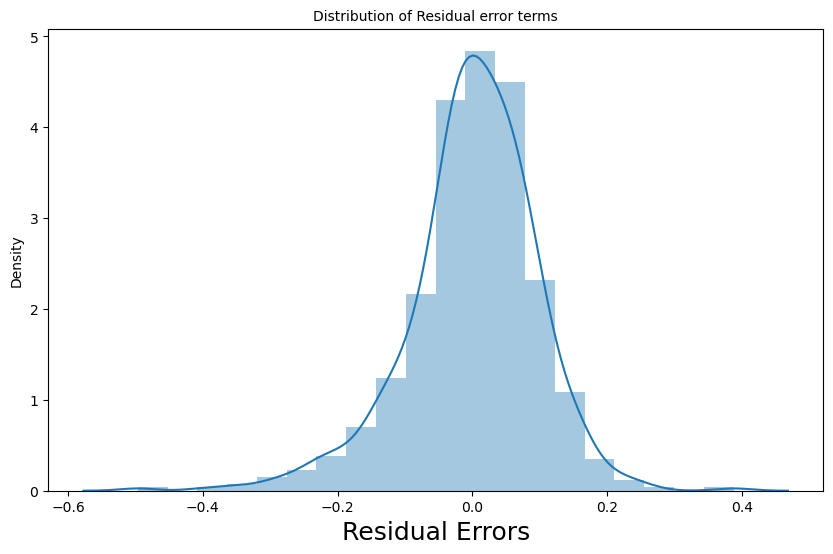

In [92]:
#Generating Dist plot of residual error terms
plt.figure(figsize=(10,6))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.xlabel('Residual Errors', fontsize = 18)
plt.title('Distribution of Residual error terms', fontsize = 10)
plt.show()

Therefore, as we can see the residual errors are almost normally distributed about 0, with a slight left skew. Hence we can say that this is a good linear model

We start by making predictions on our test set. For consistency and reasons stated earlier we will be scaling our test data set now

In [95]:
#Checking our test data set
data_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light,weathersit_Mist
620,1,0,1,25.112500,63.7083,5.542294,7804,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
533,1,0,1,23.301653,77.7917,11.707982,5099,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
272,0,0,1,23.130847,64.7500,13.833825,5202,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
605,1,0,1,28.085000,55.2083,7.541654,7697,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
101,0,0,1,20.602500,73.9167,18.416893,2034,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [96]:
#Listing all numeric variables
num_vars=['temp','hum','windspeed','cnt']

#Fitting and transforming on test data
data_test[num_vars] = scaler.transform(data_test[num_vars])
data_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light,weathersit_Mist
620,1,0,1,0.674353,0.572490,0.124372,0.890004,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
533,1,0,1,0.616630,0.751992,0.314086,0.563036,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
272,0,0,1,0.611185,0.585767,0.379497,0.575487,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
605,1,0,1,0.769107,0.464152,0.185891,0.877070,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
101,0,0,1,0.530590,0.702603,0.520516,0.192554,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [97]:
#Checking the dataset distribution again
data_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light,weathersit_Mist
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.506849,0.041096,0.705479,0.535937,0.576642,0.327781,0.506298,0.212329,0.219178,0.280822,0.102740,0.082192,0.068493,0.082192,0.061644,0.109589,0.075342,0.068493,0.095890,0.089041,0.123288,0.171233,0.116438,0.136986,0.150685,0.157534,0.109589,0.047945,0.335616
std,0.501674,0.199195,0.457396,0.227627,0.188475,0.160414,0.236941,0.410364,0.415114,0.450948,0.304664,0.275602,0.253460,0.275602,0.241335,0.313452,0.264852,0.253460,0.295454,0.285783,0.329899,0.378009,0.321854,0.345016,0.358973,0.365558,0.313452,0.214386,0.473831
min,0.000000,0.000000,0.000000,-0.048868,-0.239512,0.047441,-0.050647,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339994,0.453266,0.213781,0.358697,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.577422,0.583377,0.305144,0.510577,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.727720,0.698353,0.412448,0.675601,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.964059,0.958022,0.824380,0.980781,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dividing the test data into X and y sets for evaluating the model

In [99]:
y_test = data_test.pop('cnt')
X_test = data_test

In [100]:
#Checking the shape of X_test 
X_test.shape

(146, 28)

In [101]:
#Checking the shape of y_test 
y_test.shape

(146,)

Selecting features as per Model no 5

In [103]:
#Features from model no 10
X_train_new5.columns

Index(['yr', 'temp', 'windspeed', 'season_spring', 'season_winter', 'mnth_Dec',
       'mnth_July', 'mnth_Nov', 'weekday_Sun', 'weathersit_Light',
       'weathersit_Mist'],
      dtype='object')

In [104]:
# We are now creating a new dataset from X_test using the selected features
# and also by adding a constant variable 
X_test_new = sm.add_constant(X_test[X_train_new5.columns])
X_test_new.head()

,const,yr,temp,windspeed,season_spring,season_winter,mnth_Dec,mnth_July,mnth_Nov,weekday_Sun,weathersit_Light,weathersit_Mist
620,1.0,1,0.674353,0.124372,0,0,0,0,0,0,0,0
533,1.0,1,0.616630,0.314086,0,0,0,0,0,0,0,1
272,1.0,0,0.611185,0.379497,0,1,0,0,0,0,0,0
605,1.0,1,0.769107,0.185891,0,0,0,0,0,0,0,0
101,1.0,0,0.530590,0.520516,0,0,0,0,0,0,0,1


In [105]:
#Predicting y values
y_pred = lm5.predict(X_test_new)

#### Creating a regression plot between Predicted and Actual values of Y test

Text(0, 0.5, 'Actual Count')

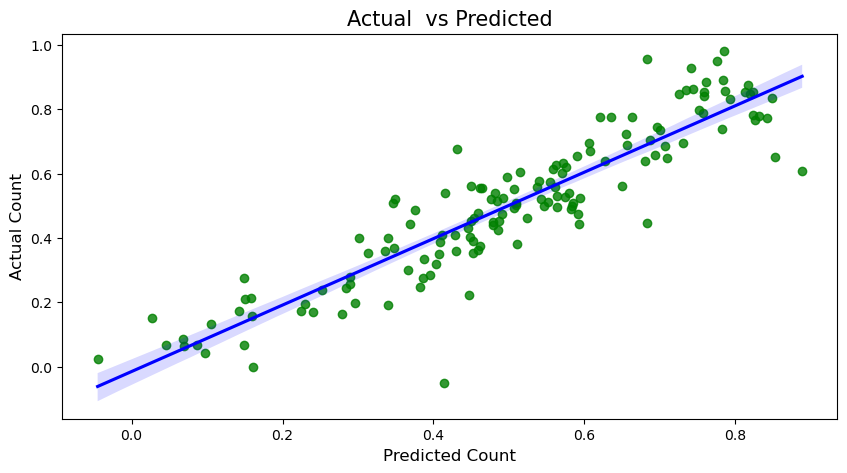

In [107]:
plt.figure(figsize=(10,5))

sns.regplot(x=y_pred, y=y_test, scatter_kws={"color": "green"},fit_reg=True, line_kws={"color": "blue"})

plt.title('Actual  vs Predicted', fontsize=15)
plt.xlabel('Predicted Count', fontsize=12)
plt.ylabel('Actual Count', fontsize=12)

Therefore we see a fairly linear relationship between the Actual count and the Predicted count, albeit with outliers, with a fairly narrow and constant variance. This indicates homoscedasticity and tells us that our model is fairly accurate in predicting the values

#### Evaluating R-squared value of the model

In [110]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.8259110940971626

#### Evaluating Adjusted R-squared value of the model

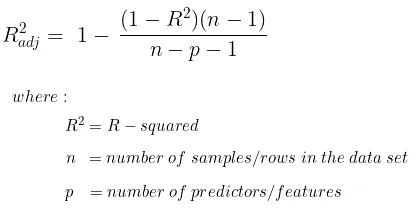



In [112]:
#According to the formula of Adjusted R-squared above
n = 146
p = 11
Adj_r2 = 1 - (1 - r2)*(n-1)/(n-p-1)
print(Adj_r2)

0.811620213761855


#### Therefore as per our model,

##### Training R-squared value = 83%

##### Training Adjusted R-squared value = 82.7%

##### Test R-squared value = 82.59%

##### Test Adjusted R-squared value = 81.16%

The difference between the training and test R-squared values is 0.41%
The difference between the training and test adjusted R-squared values is 1.54%

#### Therefore, we can observe that the difference between the R-squared values of training and testing datasets are less than 5%. Thus we can say that we have a fairly good model on our hands

### BUSINESS INTERPRETATIONS OF THE MODEL AS PER PROBLEM STATEMENT

### Which variables are significant in predicting the demand for shared bikes?

As observed already,

our demand for booking count can be modelled as

$$
 count = 0.2573 - (0.1215 \times windspeed) + (0.4353 \times temp) + (0.2476 \times yr) - (0.1290 \times spring) - (0.0414 \times Sun) - (0.2798 \times  Light) + (0.0774 \times winter) - (0.0781 \times  Nov)- (0.0851 \times  Mist)- (0.0853 \times  July)- (0.0639 \times  Dec)
$$

### How well those variables describe the bike demands?

Ignoring the intercept from the constant (b0), we can come to the following conclusions:

1. It has the highest positive coefficient for 'temp' or the temperature. It means that with all other parameters constant, unit increase in temperature increases the booking count by 0.4353 units
2. It has a similar relationship with 'yr' or the year with a coefficient of 0.2476. This implies that as the year progresses from 2018 to 2019, the demand for booking increases by 0.2476 units keeping all other parameters constant
3. It also has a positive relationship with 'winter' with a coefficient of 0.0774. This implies that with the onset of the Winter season, the demand for booking increases by 0.0774 units keeping all other parameters constant
4. It has the highest negative coefficient of -0.2798 for the parameter 'Light'. Therefore, during the weather condition of Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds the demand for booking will fall by 0.2798 units keeping all other parameters constant
5. It is also negatively correlated with other params such as windspeed (decreasing by 0.1215 units with a unit increase in windspeed keeping all other parameters constant), spring (decreasing by 0.1290 units when Spring season starts keeping all other parameters constant), for weather conditions like Mist, Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds (decreasing by 0.0851 units keeping all other parameters constant), during the months of July, November and December (decreasing by 0.0853, 0.0781 and 0.0639 units respectively keeping all other parameters constant) and Sun (decreasing by 0.0344 units on Sundays keeping all other parameters constant)

### CONCLUSION:

1. Therefore, the demand for booking is likely to increase with temperature, the year of booking and with the onset of the Winter season
2. The demand is likely to decrease with windspeed, the onset of Spring season, weather conditions such as Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds, Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist, during the months of July, November and December and also during Sundays